# 2.1 Logistic regression 
#project on health pysical fit or not 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotilb inline
import seaborn as sns

#load a data 
ds=pd.read_csv("Downloads\hearing_test.csv")
ds.head(10)

UsageError: Line magic function `%` not found.


In [2]:
#load a data 
ds=pd.read_csv("Downloads\hearing_test.csv")
ds.head(10)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
5,58.0,23.0,0
6,66.0,28.9,0
7,38.0,41.1,1
8,53.0,32.0,0
9,43.0,41.5,1


# data understanding 
#feature age= ageof participanet
physical_score =score achivesd during physcial test
label/target
test_result=if no pass 0 if pass then 1

In [3]:
#dataset understanding 
ds.shape

(5000, 3)

In [4]:
ds.dtypes


age               float64
physical_score    float64
test_result         int64
dtype: object

In [5]:
ds.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [6]:
ds["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [8]:
#EDA and Visuliazation
ds.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


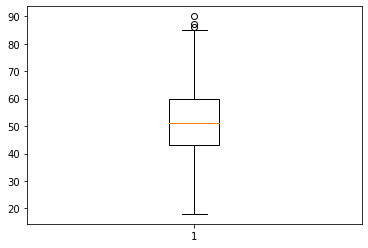

In [9]:
plt.boxplot(ds["age"])
plt.show()

In [10]:
sns.countplot(data=ds,x="test_result")
plt.show()

NameError: name 'sns' is not defined

In [ ]:
sns.boxplot(x="test_result",y="age",data=ds)
plt.show()

In [11]:
sns.boxplot(x="test_result",y="physical_score",data=ds)

plt.show()

NameError: name 'sns' is not defined

In [12]:
sns.scatterplot(x="age",y="physical_score",data=ds,hue="test_result")
plt.show()

NameError: name 'sns' is not defined

In [13]:
sns.pairplot(ds,hue="test_result")


NameError: name 'sns' is not defined

In [14]:
sns.heatmap(ds.corr(),annot=True)

NameError: name 'sns' is not defined

In [15]:
sns.scatterplot(x="physical_score",y="test_result",data=ds)

NameError: name 'sns' is not defined

In [16]:
sns.scatterplot(x="age",y="test_result",data=ds)

NameError: name 'sns' is not defined

In [17]:
ds.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [18]:
#create x, y
x=ds.drop("test_result",axis=1)
y=ds["test_result"]

In [19]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [20]:
#scaling use here standardscaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression 

log_model=LogisticRegression()
log_model.fit(x_train,y_train)



LogisticRegression()

In [23]:
#prediction 
#predicctopn on ur train data 
ytrain_prediction=log_model.predict(x_train)

#predicctopn on ur test data 
ytest_prediction=log_model.predict(x_test)

In [24]:
#EVALUTION 
from sklearn.metrics import accuracy_score

accuracy_score(y_train,ytrain_prediction)  #train accuracy


0.9162857142857143

In [25]:
accuracy_score(y_test,ytest_prediction)    #test accuracy


0.914

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ytest_prediction)

array([[557,  77],
       [ 52, 814]], dtype=int64)

C:\Users\Rohit Jain\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


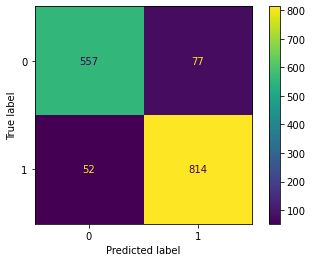

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,x_test,y_test)

In [28]:
#cross validation 
from sklearn.model_selection import cross_val_score
sc=cross_val_score(log_model,x,y,cv=5)
print(sc)
sc.mean()

[0.933 0.915 0.908 0.91  0.914]


0.916

In [33]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,ytrain_prediction))

ValueError: Found input variables with inconsistent numbers of samples: [1500, 3500]

# auc

C:\Users\Rohit Jain\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


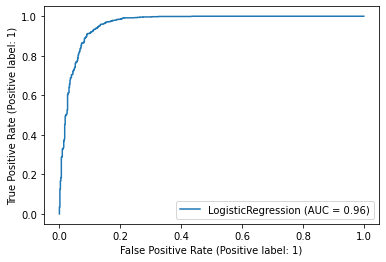

In [30]:
from sklearn.metrics import plot_roc_curve
print(plot_roc_curve(log_model,x_test,y_test))